## Online Payment Fraud Detection

This project builds a machine learning model to detect fraudulent online payment transactions. It uses real-world transactional data and demonstrates effective techniques for handling imbalanced classification problems.

🎯 Objective
The primary goal of this project is to:
- Analyze mobile money transaction data.
- Identify patterns and anomalies in transaction behaviors.
- Build and compare multiple machine learning models for fraud detection.

In [4]:
!pip install -q gdown
!gdown "https://drive.google.com/uc?export=download&id=1nz017dgZbNDLaJiWKR1nqDcW4WSNfItD"
!head -n 5 Fraud.csv
import pandas as pd
df = pd.read_csv('Fraud.csv')
df.head()


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1nz017dgZbNDLaJiWKR1nqDcW4WSNfItD
From (redirected): https://drive.google.com/uc?export=download&id=1nz017dgZbNDLaJiWKR1nqDcW4WSNfItD&confirm=t&uuid=b5ab2798-ad03-4619-ae23-4c573e3e9da2
To: /content/Fraud.csv
100% 494M/494M [00:05<00:00, 89.7MB/s]
step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Importing Libraries
The following libraries are imported for this project:
- **pandas** → for data manipulation and analysis
- **numpy** → for numerical operations
- **matplotlib** & **seaborn** → for data visualization
- **scikit-learn** → for machine learning models and preprocessing

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

In [6]:
df = pd.read_csv('Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Exploratory Data Analysis


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
df.shape

(6362620, 11)

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

print(df.isnull().sum())

df_cleaned = df.drop(['nameOrig', 'nameDest', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)

df_cleaned['type'] = LabelEncoder().fit_transform(df_cleaned['type'])

print(df_cleaned['isFraud'].value_counts(normalize=True))


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [11]:
df.duplicated().sum()

np.int64(0)

## Data Visualization

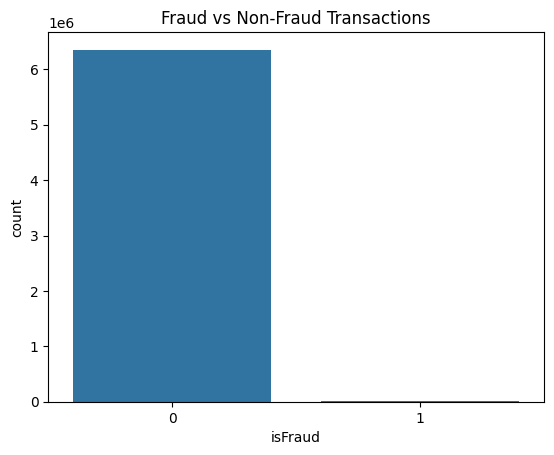

In [12]:
# Fraud vs Non-Fraud count
sns.countplot(x='isFraud', data=df_cleaned)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

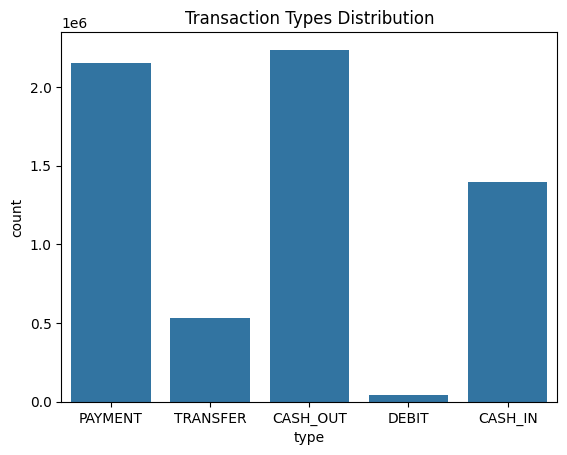

In [13]:
# Transaction types
sns.countplot(x='type', data=df)
plt.title("Transaction Types Distribution")
plt.show()


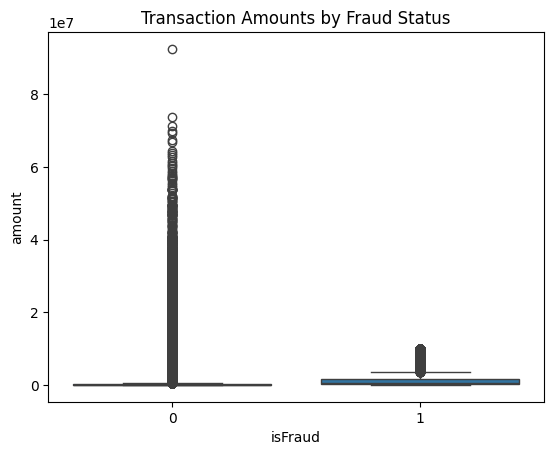

In [14]:
# Distribution of transaction amounts by fraud
sns.boxplot(x='isFraud', y='amount', data=df_cleaned)
plt.title("Transaction Amounts by Fraud Status")
plt.show()

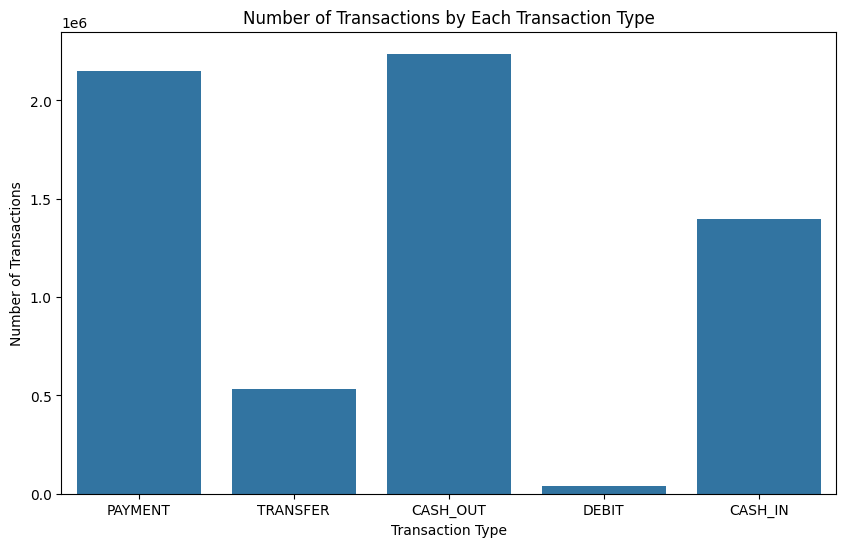

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Number of Transactions by Each Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

In [16]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
                values = quantity,
                names = transactions,hole = 0.5,
                title = "Distribution of transaction type")
figure.show()

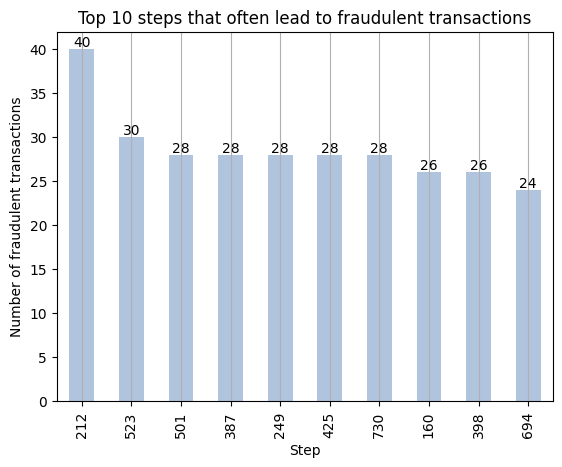

In [17]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

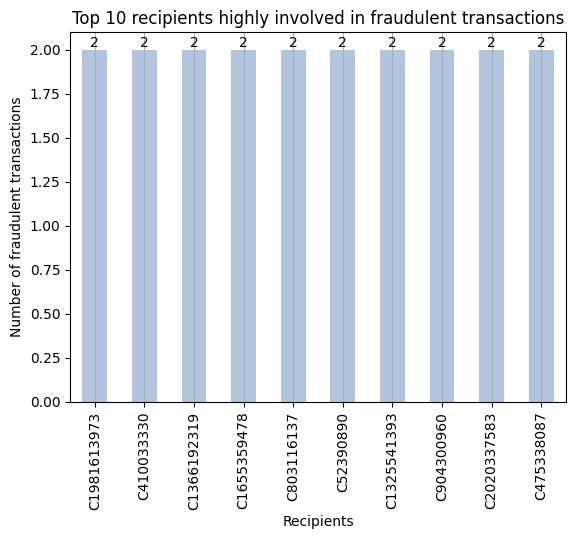

In [18]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

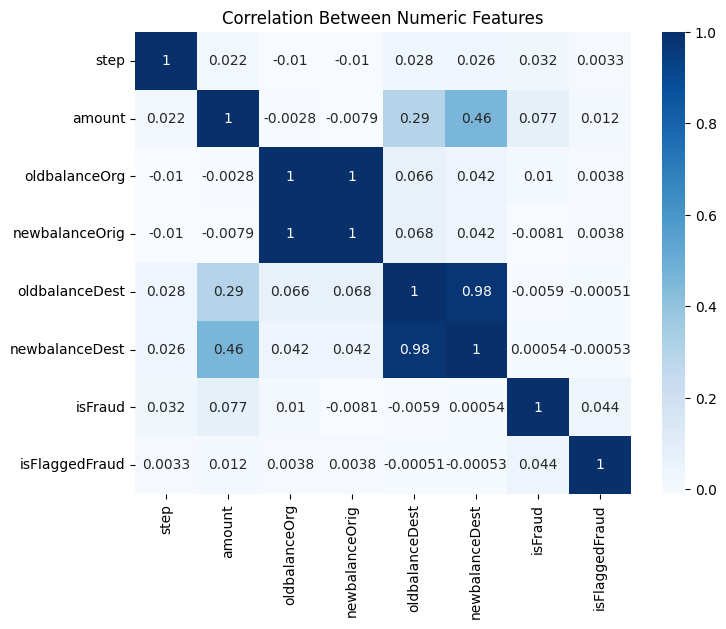

In [19]:
numeric_df = df.select_dtypes(include='number')

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title('Correlation Between Numeric Features')
plt.show()

## Model Building

In [20]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [21]:
from sklearn.model_selection import train_test_split
X = df[['type','amount','oldbalanceOrg','newbalanceOrig']]
y = df['isFraud']
y

,isFraud
0,No Fraud
1,No Fraud
2,Fraud
3,Fraud
4,No Fraud
...,...
6362615,Fraud
6362616,Fraud
6362617,Fraud
6362618,Fraud


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
X_train.shape

(5090096, 4)

In [23]:
X_test.shape


(1272524, 4)

In [24]:
y_train.shape


(5090096,)

In [25]:
y_test.shape


(1272524,)

In [26]:
#Our model gives the 100% of accuracy.

X

,type,amount,oldbalanceOrg,newbalanceOrig
0,2,9839.64,170136.00,160296.36
1,2,1864.28,21249.00,19384.72
2,4,181.00,181.00,0.00
3,1,181.00,181.00,0.00
4,2,11668.14,41554.00,29885.86
...,...,...,...,...
6362615,1,339682.13,339682.13,0.00
6362616,4,6311409.28,6311409.28,0.00
6362617,1,6311409.28,6311409.28,0.00
6362618,4,850002.52,850002.52,0.00


In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=500)

lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [29]:
x=df.loc[:, df.columns!='isFraud']
y=df['isFraud']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, stratify=df['isFraud'], random_state=1)
print(len(df),len(x_train),len(y_test))

6362620 5090096 1272524


In [35]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['type']]).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['type']))

X = X.join(X_encoded_df).drop(['type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

print("✅ Data ready for model training.")


✅ Data ready for model training.


In [37]:

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"🚀 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"✅ {name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)


In [38]:
# Decision Tree
evaluate_model("Decision Tree", DecisionTreeClassifier(random_state=42),
               X_train, y_train, X_test, y_test)

# Random Forest
evaluate_model("Random Forest", RandomForestClassifier(random_state=42),
               X_train, y_train, X_test, y_test)

# K-Nearest Neighbors
evaluate_model("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=3),
               X_train, y_train, X_test, y_test)

# Logistic Regression
evaluate_model("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000),
               X_train, y_train, X_test, y_test)


🚀 Training Decision Tree...
✅ Decision Tree Results:
Accuracy: 99.97%
              precision    recall  f1-score   support

       Fraud       0.88      0.87      0.88      3285
    No Fraud       1.00      1.00      1.00   2541763

    accuracy                           1.00   2545048
   macro avg       0.94      0.94      0.94   2545048
weighted avg       1.00      1.00      1.00   2545048

[[   2868     417]
 [    401 2541362]]
--------------------------------------------------
🚀 Training Random Forest...
✅ Random Forest Results:
Accuracy: 99.97%
              precision    recall  f1-score   support

       Fraud       0.98      0.78      0.87      3285
    No Fraud       1.00      1.00      1.00   2541763

    accuracy                           1.00   2545048
   macro avg       0.99      0.89      0.93   2545048
weighted avg       1.00      1.00      1.00   2545048

[[   2574     711]
 [     62 2541701]]
--------------------------------------------------
🚀 Training K-Nearest Neigh

## Conclusion


*   Random Forest obtains the highest score of all using K-fold cross-validation.

*   The best performing model is Random Forest *for* identifying fraudulent and non-fraudulent payments, as the AUC is 0.999, which is close to 1. This means it has a good separability measure, and the model has an 99.9% chance of being able to distinguish between positive and negative classes.


